In [1]:
% load_ext rpy2.ipython

In [2]:
%%R
#ip <- installed.packages() 
#pkgs.to.remove <- ip[!(ip[,"Priority"] %in% c("base", "recommended")), 1]
#sapply(pkgs.to.remove, remove.packages)

NULL


In [3]:
%%R
#source("http://bioconductor.org/biocLite.R")

NULL


In [4]:
%%R
#biocLite("phyloseq")

NULL


In [5]:
%%R
#source("http://bioconductor.org/biocLite.R")
#biocLite("phyloseq")

NULL


In [25]:
%%R
library("phyloseq")

In [7]:
%%R
library(ggplot2)

In [20]:
%%R
physeq = import_biom("../../SeqData/otu_table.tax.meta.biom", "../../SeqData/trees/fulltree.tre", parseFunction = parse_taxonomy_greengenes)

In [21]:
%%R
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4857 taxa and 102 samples ]
sample_data() Sample Data:       [ 102 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 4857 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4857 tips and 4855 internal nodes ]


In [10]:
%%R
ps.b = subset_taxa(physeq,Kingdom=="Bacteria")
ps.b = subset_samples(ps.b,sample_sums(physeq)>2000)

In [22]:
%%R
physeq.noK <- subset_samples(physeq,Trtmt!="K")
physeq.noK

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4857 taxa and 79 samples ]
sample_data() Sample Data:       [ 79 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 4857 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4857 tips and 4855 internal nodes ]


In [23]:
%%R
physeq.noSmall<-subset_samples(physeq,sample_sums(physeq)>5000)
physeq.noSmall

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4857 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 4857 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4857 tips and 4855 internal nodes ]


In [79]:
%%R
physeq.noSmall.FQ <- subset_samples(physeq,sample_sums(physeq)>1000)
physeq.noSmall.FQ <- subset_samples(physeq.noSmall.FQ,Trtmt==c("Q","F"))
physeq.noSmall.FQ

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4858 taxa and 27 samples ]
sample_data() Sample Data:       [ 27 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 4858 taxa by 7 taxonomic ranks ]


In [42]:
%%R
ps <- physeq

In [43]:
%%R
# Normalizes the sample counts by the total - i.e., reporting what fraction of each sample each OTU makes up.
ps_snorm = transform_sample_counts(ps, function(x) x / sum(x))

In [48]:
%%R
# Computing the Bray distance matrix and NMDS in parallel

ord.NMDS.full = ordinate(ps_snorm, method = "NMDS", distance = "unifrac")
NMDS.full = plot_ordination(ps_snorm, ord.NMDS.full, axes = c(1,2), justDF = TRUE)
NMDS.full$Samples = rownames(NMDS.full)

Run 0 stress 0.06161383 
Run 1 stress 0.06674563 
Run 2 stress 0.0616216 
... procrustes: rmse 0.02741123  max resid 0.15819 
Run 3 stress 0.06586941 
Run 4 stress 0.06973771 
Run 5 stress 0.06848832 
Run 6 stress 0.06866941 
Run 7 stress 0.0651104 
Run 8 stress 0.07165383 
Run 9 stress 0.06947878 
Run 10 stress 0.0589931 
... New best solution
... procrustes: rmse 0.03310746  max resid 0.1689921 
Run 11 stress 0.06498133 
Run 12 stress 0.06497858 
Run 13 stress 0.07217642 
Run 14 stress 0.06044202 
Run 15 stress 0.06111491 
Run 16 stress 0.06282575 
Run 17 stress 0.0610165 
Run 18 stress 0.0592304 
... procrustes: rmse 0.008195358  max resid 0.06784219 
Run 19 stress 0.06607112 
Run 20 stress 0.07471749 


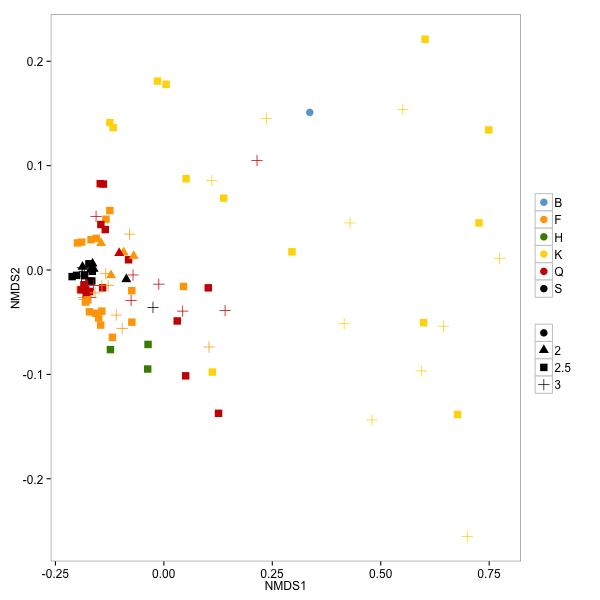

In [50]:
%%R -h 600 -w 600
D <- NMDS.full
# Sets the relevant ordination

#D$Trtmt <- as.factor(D$Trtmt)
#levels(D$Trtmt) <- c("Ferrihydrite", "Heavy Fraction", "Kaolinite", "Quartz", "Soil")

colnames(D)[1:2]<-c("NMDS1","NMDS2")
# Renames the axis columns

#D$AmdmtName = ifelse(D$Amdmt==1,"PyOM",ifelse(D$Amdmt==2,"Stover","Soil only"))
#D$AmdmtName = factor(D$AmdmtName, levels=c("Soil only", "PyOM", "Stover"))
#D$DayName = ifelse(D$Day==1,"Day 12",ifelse(D$Day==2,"Day 82","Day 1"))

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
p = ggplot(D, aes(x = NMDS1, y = NMDS2, color = Trtmt, shape = Month))

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("skyblue3","orange","chartreuse4","gold1","red3","black"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))

# Determines the color theme of the plot overall
p = p + theme_bw() +
  theme(
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
  ) +
  theme(strip.text.x = element_text(size=14, face="bold"),axis.text = element_text(size=12),legend.text = element_text(size=12),
          strip.background = element_rect(colour="white", fill="white"))

# Displays the plot object
#p = p + facet_wrap(~Trtmt, scales="free")
# The axis scales could be all optimized individually
# p = p + facet_grid(~Month)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days
#plot.full.byDay = p
p